In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

import pywt

import torch

from pytorch_shearlets.shearlets import ShearletSystem

In [2]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Device: {device}')

Device: cuda


In [4]:
shearlet = ShearletSystem(512, 512, 2, fname='cd', device=device)

In [5]:
img = np.array(pywt.data.camera()).reshape(1, 1, 512, 512)
noise = np.random.normal(np.zeros_like(img), 10*np.ones_like(img))
original = torch.from_numpy(img + noise).to(device)

coeffs = shearlet.decompose(original)
print(f'Coeffs: {coeffs.shape}')
coeffs = torch.where(abs(coeffs) < 2, torch.zeros_like(coeffs), coeffs)

x_hat = shearlet.reconstruct(coeffs)

Coeffs: torch.Size([1, 1, 512, 512, 17])


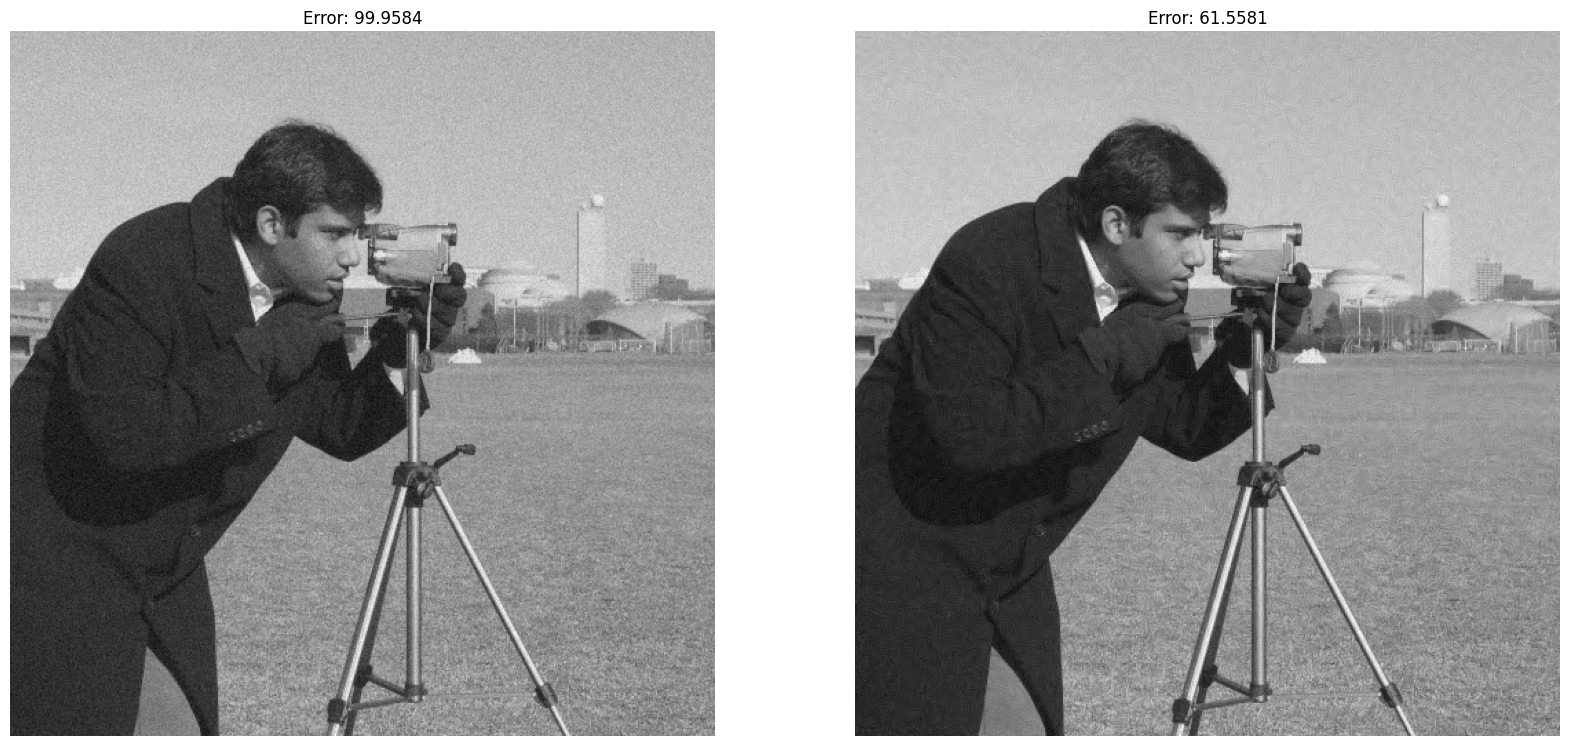

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

err1 = np.square(original.cpu().numpy().squeeze() - img).mean()
err2 = np.square(x_hat.cpu().numpy().squeeze() - img).mean()

ax[0].axis('off')
ax[0].set_title(f'Error: {err1:.4f}')
ax[0].imshow(normalize(original.cpu().numpy().squeeze()), cmap=plt.cm.gray)

ax[1].axis('off')
ax[1].set_title(f'Error: {err2:.4f}')
ax[1].imshow(normalize(x_hat.cpu().numpy().squeeze()), cmap=plt.cm.gray)

plt.show()